In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print(test.shape,"\n",train.shape)

(418, 11) 
 (891, 12)


In [7]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

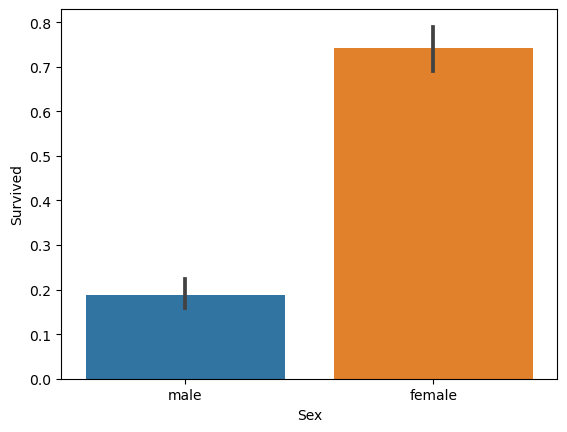

In [8]:
sns.barplot(x="Sex",y="Survived",data=train)

In [9]:
print("Percentage of men survived= ",train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)
print("Percentage of women survived= ",train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)

Percentage of men survived=  18.890814558058924
Percentage of women survived=  74.20382165605095


<Axes: xlabel='Pclass', ylabel='Survived'>

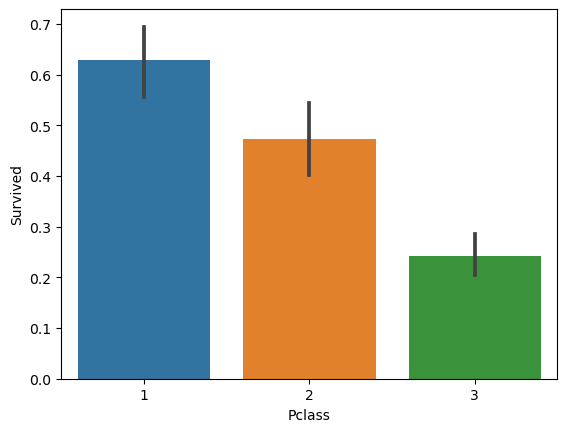

In [10]:
sns.barplot(x="Pclass",y="Survived",data=train)

In [11]:
print("Percentage of Pclass 1 survived= ",train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1]*100)
print("Percentage of Pclass 2 survived= ",train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1]*100)
print("Percentage of Pclass 3 survived= ",train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1]*100)

Percentage of Pclass 1 survived=  62.96296296296296
Percentage of Pclass 2 survived=  47.28260869565217
Percentage of Pclass 3 survived=  24.236252545824847


<Axes: xlabel='AgeGroup', ylabel='Survived'>

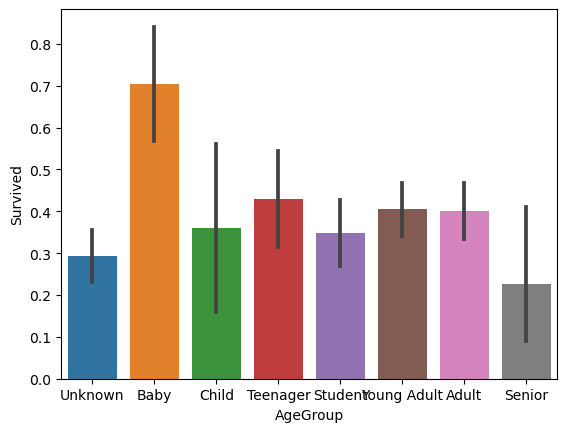

In [12]:
train.Age = train.Age.fillna(-0.5)
test.Age = test.Age.fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins, labels=labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels=labels)
sns.barplot(x='AgeGroup', y='Survived', data=train)

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [14]:
train=train.drop(['Ticket','Cabin','Fare'],axis=1)
test=test.drop(['Ticket','Cabin','Fare'],axis=1)


In [15]:
print('Number of people embarking in Southampton(S) :')
southampton=train[train['Embarked']=='S'].shape[0]
print(southampton)
print('Number of people embarking in Cherbourg(C) :')
cher=train[train['Embarked']=='C'].shape[0]
print(cher)
print('Number of people embarking in Queenston (Q) :')
queen=train[train['Embarked']=='Q'].shape[0]
print(queen)

Number of people embarking in Southampton(S) :
644
Number of people embarking in Cherbourg(C) :
168
Number of people embarking in Queenston (Q) :
77


In [16]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'AgeGroup'],
      dtype='object')

In [17]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [18]:
train=train.fillna({'Embarked':'S'})

In [19]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult


In [21]:
combine=[train,test]
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Capt','Don','Dr','Major','Rev','Jonkheer','Dona','Col'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [23]:
list(train[['Title','Survived']].groupby(['Title'],as_index=False).mean()['Title'])

['Master', 'Miss', 'Mr', 'Mrs', 'Rare', 'Royal']

In [24]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Rare':6}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [25]:
mr_age=train[train['Title']==1]['AgeGroup'].mode()#Young adult
miss_age=train[train['Title']==2]['AgeGroup'].mode()#Student
mrs_age=train[train['Title']==3]['AgeGroup'].mode()#Adult
master_age=train[train['Title']==4]['AgeGroup'].mode()#Baby
royal_age=train[train['Title']==5]['AgeGroup'].mode()#Adult
rare_age=train[train['Title']==6]['AgeGroup'].mode()#Adult


age_title_map = {
    1: 'Young Adult',
    2: 'Student',
    3: 'Adult',
    4: 'Baby',
    5: 'Adult',
    6: 'Adult'
}


# Replace 'Unknown' values with appropriate categories
for i in range(len(train["AgeGroup"])):
    if train["AgeGroup"][i] == "Unknown":
        train['AgeGroup'][i] = age_title_map[train['Title'][i]]


for i in range(len(test["AgeGroup"])):
    if test["AgeGroup"][i] == "Unknown":
        test['AgeGroup'][i] = age_title_map[test['Title'][i]]

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [27]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Embarked         object
AgeGroup       category
Title             int64
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder#To convert into integer
le=LabelEncoder()
transform=['Sex','AgeGroup','Embarked']
for i in transform:
    train[i]=le.fit_transform(train[i])

In [29]:
for i in transform:
    test[i]=le.fit_transform(test[i])

Machine Learning

In [30]:
X_train=train.drop(["PassengerId","Name","Survived"],axis=1)
Y_train=train["Survived"]
X_test=test.drop(["PassengerId","Name"],axis=1)

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
preds=lr.predict(X_test)

In [32]:
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [33]:
ids=test["PassengerId"]
output=pd.DataFrame({'PassengerId':ids,'Survived':preds})
output.to_csv('result.csv',index=False)

In [34]:
from sklearn.metrics import accuracy_score
train_preds=lr.predict(X_train)
accuracy_score(train_preds,Y_train)

0.7912457912457912

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,6,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,6,1
